In [2]:
import pandas as pd
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/shared/homeworks/python_ds_miniprojects/3/user_data.csv')

In [3]:
df

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
df.shape
x = df.shape[0]
y = df.shape[1]
df_shape = 'df has {} rows and {} columns'.format(x, y)
df_shape

'df has 2954 rows and 3 columns'

In [17]:
user_df = df.isna()
na_number = user_df.sum()
na_number

client     0
premium    0
age        0
dtype: int64

In [21]:
df_types = df.dtypes
df_types

client     int64
premium     bool
age        int64
dtype: object

In [23]:
df = df.astype({'age': 'int'})
df_types

client     int64
premium     bool
age        int64
dtype: object

## Удаление колонок

In [24]:
df = df.drop(columns=['sex', 'age'])

## Удаление дубликатов во всем датафрейме и в отдельных столбцах

In [ ]:
df.drop_duplicates()
df.drop_duplicates(subset='my_unique_column')
df = df.drop_duplicates(subset='client_id')

In [ ]:
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    elif i > 0:
        positive_numbers.append(i)

In [27]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/3_taxi_peru.csv'

In [202]:
taxi = pd.read_csv(path_to_file, sep=';')
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

# OR

# taxi = pd.read_csv(path_to_file, sep=';')

# taxi['start_at'] = pd.to_datetime(taxi.start_at)
# taxi['end_at'] = pd.to_datetime(taxi.end_at)
# taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)

# taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

In [204]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [205]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'] = taxi['wait_time'].astype('timedelta64[m]')

In [206]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [211]:
late_taxi = taxi.query("start_type == 'reserved' and wait_time > 0.0")

In [212]:
late_taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
11,af7a0d5b65562d9e4f7749317efb1a3a,7abecd4f47c2c1d5390d86eb22181c90,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,7.0
51,e1b5a14977e84b1900b5b69e040c3de1,1e44c0fd0a266c3719ff30410baa07cd,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,reserved,2010-10-12 19:45:00,"-12,11184692","-77,03222656",2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,iPhone,NaN,5.0,11.0
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
83,cd6a65a00f3ac91060d336a9f037f7f6,cb6ea169cefc7a0a5f1f8bd8ebbe3223,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-16 22:30:00,"-12,10181985","-76,97150599",2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,Android,0.0,4.0,3.0
157,e1332f68e81526e498e4d845233a17ee,be2d7041cb5bae52cf3edaaf03798426,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,reserved,2010-03-27 23:30:00,"-12,0966369","-77,0295319",2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,web,NaN,5.0,1.0


In [213]:
late_taxi = late_taxi.groupby('driver_id', as_index=False).agg({'journey_id': 'count'})

In [215]:
late_taxi

,driver_id,journey_id
0,0aa51cbf1d21c8c6462dbf0e10028a07,8
1,0fd4a08189ac948f6beaa2d314c6a7ea,2
2,1083bcecf6e3df9df65525ec3a66b5fb,6
3,1238e44402a93366489cbff9884d463c,4
4,12c472dd8efc6ed622ae8669251b82f1,4
...,...,...
100,fa5c3d1ad73379ba86b960210e63d537,1
101,fb81277200c0aea311ad85f90d548d5a,6
102,fdba41f4b66d90ed7863fce32b97a19f,1
103,ff5c924e0b630fd7c019a4234059081c,5


In [217]:
late_taxi.sort_values('journey_id', ascending=False)

,driver_id,journey_id
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


In [218]:
late_taxi2 = taxi.groupby(['driver_id', 'driver_score'], as_index=False).agg({'journey_id': 'count'}).rename(columns={'journey_id':'count'})

In [219]:
late_taxi2.sort_values('count', ascending=False)

,driver_id,driver_score,count
377,c814db2127582cf95dea1f74f43127c2,5.0,481
415,d665fb9f75ef5d9cd0fd89479380ba78,5.0,317
120,406921adcca37705ef527b4246c0cfea,5.0,275
297,ab581e277813d5d9ff98d03b1c96a13f,5.0,235
504,ff5c924e0b630fd7c019a4234059fdf4,5.0,221
...,...,...,...
345,b862b75318ed157b2e574a204c8edd8a,0.0,1
346,b862b75318ed157b2e574a204c8edd8a,1.0,1
347,b862b75318ed157b2e574a204c8edd8a,3.0,1
147,54c88ff5110a79082d341066aa4483a6,4.0,1


In [220]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')
taxi['week'] = taxi.start_at.dt.isocalendar().week

In [221]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday,week
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday,46
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday,22
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday,22
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday,22
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday,36


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
taxi_orders_by_month = taxi.groupby('month', as_index=False).agg({'journey_id': 'count'}).rename(columns={'journey_id':'count'})

In [224]:
taxi_orders_by_month

,month,count
0,1,573
1,2,766
2,3,983
3,4,1445
4,5,1584
5,6,1936
6,7,1512
7,8,2120
8,9,2598
9,10,3240


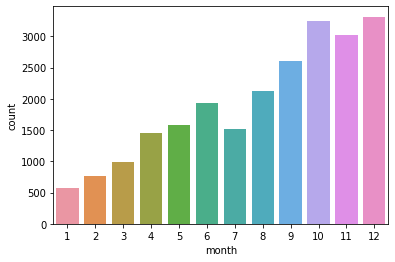

In [225]:
graph1 = sns.barplot(data=taxi_orders_by_month, x='month', y='count')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


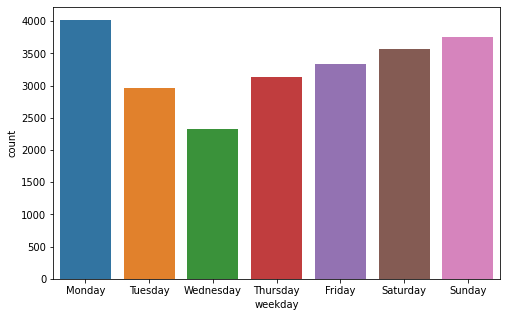

In [226]:
plt.figure(figsize=(8,5))
graph2 = sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [227]:
dau_wau_mau = taxi.groupby(['month', 'week', 'weekday'], as_index=False).user_id.nunique()

In [228]:
dau_wau_mau

,month,week,weekday,user_id
0,1,1,Friday,10
1,1,1,Monday,8
2,1,1,Saturday,9
3,1,1,Sunday,10
4,1,1,Thursday,10
...,...,...,...,...
360,12,52,Friday,20
361,12,52,Monday,51
362,12,52,Thursday,31
363,12,52,Tuesday,42


In [229]:
mau = taxi.groupby('month', as_index=False).user_id.nunique()

In [230]:
mau

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


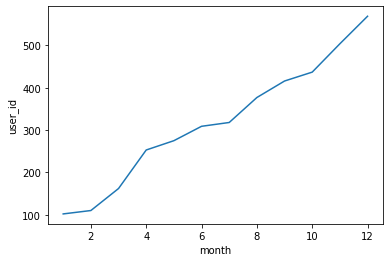

In [231]:
sns.lineplot(data=mau, x="month", y="user_id")